In [28]:
! pip install numpy pandas matplotlib seaborn scikit-learn scipy


In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

In [30]:
class DataLoader:
    def __init__(self):
        self.df = None
        self.load_data()

    def load_data(self):
        """Load dataset from CSV."""
        self.df = pd.read_csv("/content/Health_Sleep_Statistics.csv")

    def display_info(self):
        """Display basic info about the dataset."""
        print(self.df.head())
        print(self.df.size)
        print(self.df.shape)
        print(self.df.info())
        print(self.df.describe())
        print(self.df.isna().sum())
        print(self.df.duplicated().sum())
        print(self.df.columns)

In [31]:

class DataAnalysis:
    def __init__(self, df):
        self.df = df  # Store the data

    # Find correlation between Age and Sleep Quality
    def correlation(self):
        age_vs_sleep_quality_corr = self.df[['Age', 'Sleep Quality']].corr()
        return age_vs_sleep_quality_corr.iloc[0, 1]

    # Plot a graph of Age vs Sleep Quality with a regression line
    def plot_age_vs_sleep_quality(self):
        plt.figure(figsize=(12, 8))
        sns.set(style="whitegrid")
        sns.regplot(
            x='Age', y='Sleep Quality', data=self.df,
            scatter_kws={'s': 100, 'alpha': 0.6, 'color': '#3498db'},
            line_kws={'color': '#e74c3c', 'linewidth': 2}
        )
        plt.title("Age vs Sleep Quality", fontsize=20, fontweight='bold', color='#2c3e50')
        plt.xlabel("Age", fontsize=15)
        plt.ylabel("Sleep Quality", fontsize=15)
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        sns.despine()
        plt.show()

    # Fit and return a linear regression model
    def linear_regression(self, X, Y):
        model = LinearRegression()
        model.fit(X, Y)
        return model

    # Plot actual vs predicted data using linear regression
    def plot_linear_regression(self, X, Y, model):
        plt.figure(figsize=(12, 6))
        sns.scatterplot(x='Age', y='Sleep Quality', data=self.df, label='Actual Data')
        plt.plot(X, model.predict(X), color='green', label='Predicted Data')
        plt.title("Age vs Sleep Quality")
        plt.xlabel("Age")
        plt.ylabel("Sleep Quality")
        plt.legend()
        plt.show()



In [32]:
class SleepDurationAnalysis:
    @staticmethod
    def sleep_duration_hours_helper_function(str_time):
        """Helper function to convert time in 'HH:MM' format to hours."""
        h, m = map(int, str_time.split(':'))
        return h + m / 60

    def __init__(self, df):
        self.df = df

    def process_sleep_times(self):
        """Convert 'Bedtime' and 'Wake-up Time' columns to hours."""
        self.df['Bedtime'] = self.df['Bedtime'].apply(self.sleep_duration_hours_helper_function)
        self.df['Wake-up Time'] = self.df['Wake-up Time'].apply(self.sleep_duration_hours_helper_function)
        self.df['Sleep Duration Hours'] = (self.df['Wake-up Time'] - self.df['Bedtime']) % 24

    def plot_sleep_time_vs_quality(self):
        """Enhanced plot of Bedtime, Wake-up Time, and Sleep Duration vs Sleep Quality with regression line on the scatter plot."""

        # Bedtime vs Sleep Quality
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Bedtime', y='Sleep Quality', data=self.df, palette='Blues_d')
        plt.xlabel("Bedtime", fontsize=15)
        plt.ylabel("Sleep Quality", fontsize=15)
        plt.title("Bedtime vs Sleep Quality", fontsize=18, fontweight='bold', color='#2c3e50')
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        sns.despine()
        plt.show()

        # Wake-up Time vs Sleep Quality
        plt.figure(figsize=(12, 6))
        sns.barplot(x='Wake-up Time', y='Sleep Quality', data=self.df, palette='Purples_d')
        plt.xlabel("Wake-up Time", fontsize=15)
        plt.ylabel("Sleep Quality", fontsize=15)
        plt.title("Wake-up Time vs Sleep Quality", fontsize=18, fontweight='bold', color='#2c3e50')
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        sns.despine()
        plt.show()

        # Sleep Duration Hours vs Sleep Quality with regression line
        plt.figure(figsize=(12, 6))
        sns.scatterplot(
            x='Sleep Duration Hours', y='Sleep Quality', data=self.df,
            hue='Sleep Quality', palette='coolwarm', size='Sleep Quality', sizes=(50, 200), alpha=0.8
        )

        # Regression line
        X = self.df[['Sleep Duration Hours']]
        Y = self.df['Sleep Quality']
        model = LinearRegression()
        model.fit(X, Y)
        plt.plot(X, model.predict(X), color='red', linewidth=2, label='Best Fit Line')

        # Enhancing aesthetics
        plt.legend(title='Sleep Quality', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
        plt.xlabel("Sleep Duration Hours", fontsize=15)
        plt.ylabel("Sleep Quality", fontsize=15)
        plt.title("Sleep Duration Hours vs Sleep Quality", fontsize=18, fontweight='bold', color='#2c3e50')
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        sns.despine()
        plt.show()


In [33]:
class PhysicalActivityAnalysis:
    def __init__(self, df):
        self.df = df

    def plot_physical_activity_vs_sleep_quality(self):
        """Enhanced plot of Physical Activity Level vs Sleep Quality."""
        plt.figure(figsize=(12, 8))
        sns.set(style="whitegrid")
        sns.barplot(
            x='Physical Activity Level', y='Sleep Quality', data=self.df,
            palette='viridis'
        )
        plt.title("Physical Activity Level vs Sleep Quality", fontsize=20, fontweight='bold', color='#34495e')
        plt.xlabel("Physical Activity Level", fontsize=15)
        plt.ylabel("Sleep Quality", fontsize=15)
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        sns.despine()
        plt.show()

    def calories_burned_vs_sleep_quality(self):
        """Enhanced plot of Calories Burned vs Sleep Quality with regression line."""
        plt.figure(figsize=(12, 8))

        # Scatter plot with color gradient
        sns.scatterplot(
            x='Calories Burned', y='Sleep Quality', data=self.df,
            hue='Sleep Quality', palette='coolwarm', size='Sleep Quality', sizes=(50, 200), alpha=0.8
        )

        # Add regression line
        X = self.df[['Calories Burned']]
        Y = self.df['Sleep Quality']
        model = LinearRegression()
        model.fit(X, Y)
        plt.plot(X, model.predict(X), color='red', linewidth=2, label='Best Fit Line')

        # Enhancing aesthetics
        plt.legend(title='Sleep Quality', loc='upper left', bbox_to_anchor=(1, 1), fontsize=12)
        plt.xlabel("Calories Burned", fontsize=15)
        plt.ylabel("Sleep Quality", fontsize=15)
        plt.title("Calories Burned vs Sleep Quality", fontsize=18, fontweight='bold', color='#2c3e50')
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        sns.despine()
        plt.show()

In [39]:
class DietaryHabitsAnalysis:
    def __init__(self, df):
        self.df = df

    def plot_dietary_habits_vs_sleep_quality(self):
        """Enhanced bar graph with individual points for Dietary Habits vs Sleep Quality."""
        plt.figure(figsize=(14, 8))
        sns.set(style="whitegrid")

        self.df['Dietary Habits'] = self.df['Dietary Habits'].astype('category')
        mean_sleep_quality = self.df.groupby('Dietary Habits')['Sleep Quality'].mean()
        bar_colors = sns.color_palette("mako", len(mean_sleep_quality))
        bars = plt.bar(mean_sleep_quality.index, mean_sleep_quality, color=bar_colors, width=0.6)

        for i, dietary_habit in enumerate(mean_sleep_quality.index):
            individual_points = self.df[self.df['Dietary Habits'] == dietary_habit]['Sleep Quality']
            plt.scatter([dietary_habit] * len(individual_points), individual_points, color='black', alpha=0.6, s=30, zorder=3)

        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.05, f'{yval:.2f}', ha='center', va='bottom', fontsize=12, color='black')

        # Aesthetic improvements
        plt.title("Dietary Habits vs Sleep Quality", fontsize=20, fontweight='bold', color='#34495e')
        plt.xlabel("Dietary Habits", fontsize=15)
        plt.ylabel("Sleep Quality", fontsize=15)
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', linewidth=0.5)
        sns.despine()
        plt.tight_layout()

        plt.show()

In [35]:

class SleepDisorderAnalysis:
    def __init__(self, df):
        self.df = df

    def plot_sleep_disorder_vs_sleep_quality(self):
        """Enhanced plot of Sleep Disorders vs Sleep Quality."""
        plt.figure(figsize=(12, 8))
        sns.set(style="whitegrid")
        sns.boxplot(
            x='Sleep Disorders', y='Sleep Quality', data=self.df,
            palette='rocket'
        )
        plt.title("Distribution of Sleep Quality by Sleep Disorders", fontsize=20, fontweight='bold', color='#34495e')
        plt.xlabel("Sleep Disorders", fontsize=15)
        plt.ylabel("Sleep Quality", fontsize=15)
        plt.grid(color='gray', linestyle='--', linewidth=0.5)
        sns.despine()
        plt.show()

In [36]:

class FinalAnalysis:
    def __init__(self, df):
        self.df = df

    def correlation_matrix(self):
        """Enhanced correlation matrix heatmap of numeric columns."""
        plt.figure(figsize=(10, 8))
        corr = self.df.select_dtypes(include=['number']).corr()
        sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5, square=True, cbar_kws={"shrink": .8})
        plt.title("Correlation Matrix", fontsize=20, fontweight='bold', color='#34495e')
        plt.show()

Dataset Information:
   User ID  Age Gender  Sleep Quality Bedtime Wake-up Time  Daily Steps  \
0        1   25      f              8   23:00        06:30         8000   
1        2   34      m              7   00:30        07:00         5000   
2        3   29      f              9   22:45        06:45         9000   
3        4   41      m              5   01:00        06:30         4000   
4        5   22      f              8   23:30        07:00        10000   

   Calories Burned Physical Activity Level Dietary Habits Sleep Disorders  \
0             2500                  medium        healthy              no   
1             2200                     low      unhealthy             yes   
2             2700                    high        healthy              no   
3             2100                     low      unhealthy             yes   
4             2800                    high         medium              no   

  Medication Usage  
0               no  
1              yes  
2 

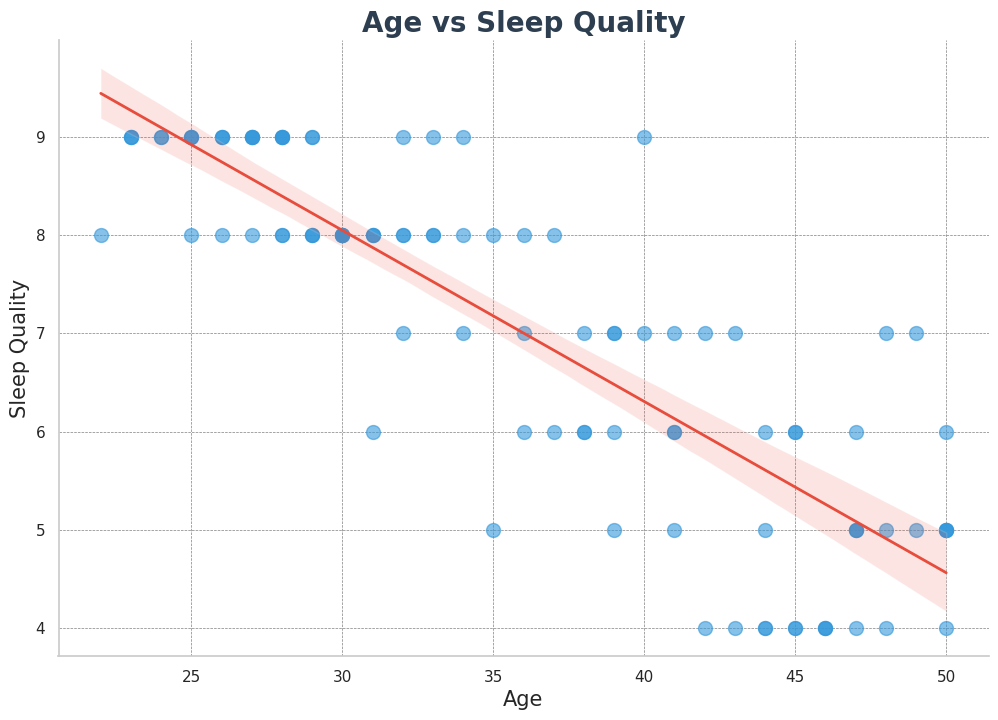

Correlation coefficient between Age and Sleep Quality: -0.8483562912262651

Analyzing Sleep Duration...


<ipython-input-32-16b7241a381d>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Bedtime', y='Sleep Quality', data=self.df, palette='Blues_d')


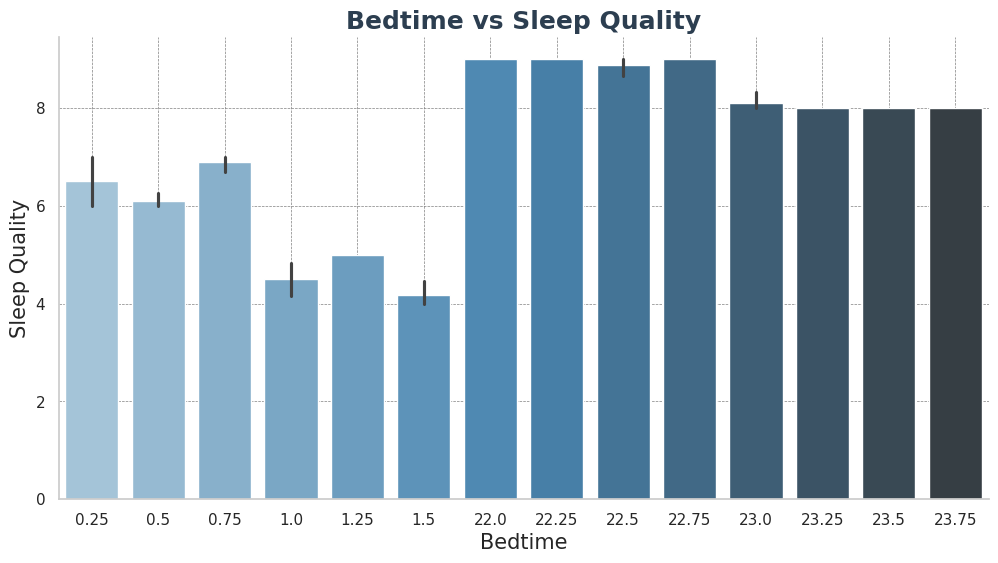

<ipython-input-32-16b7241a381d>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wake-up Time', y='Sleep Quality', data=self.df, palette='Purples_d')


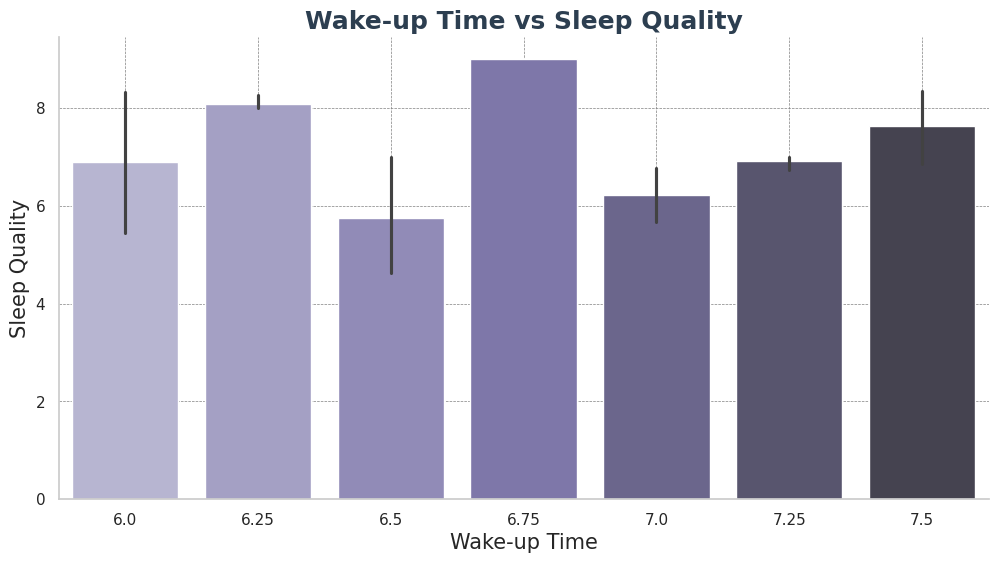

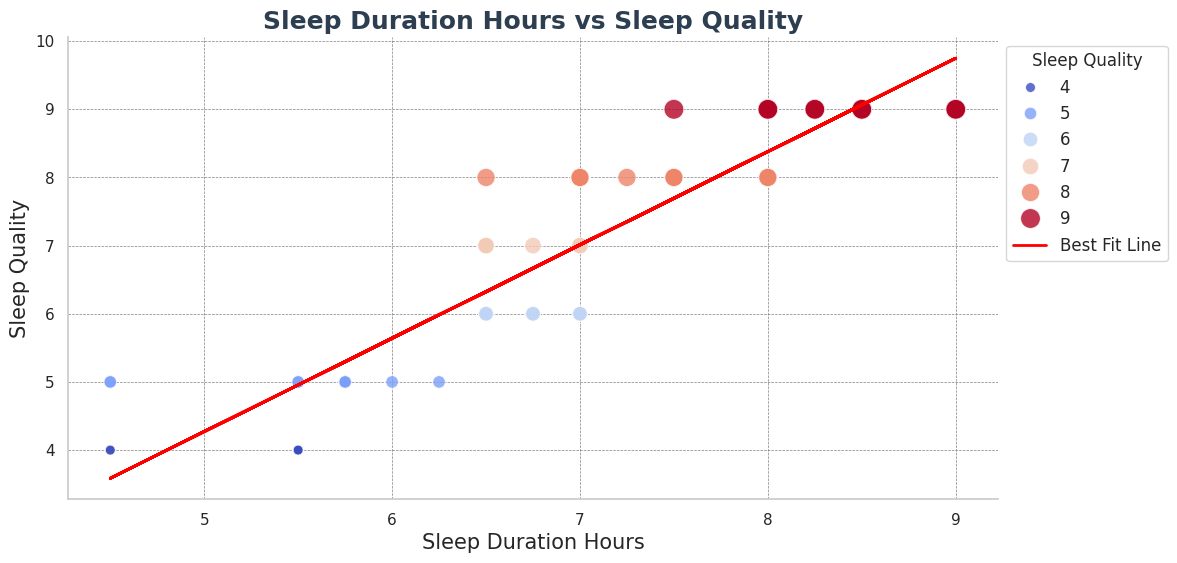


Analyzing Physical Activity...


<ipython-input-33-1898831b4a7d>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


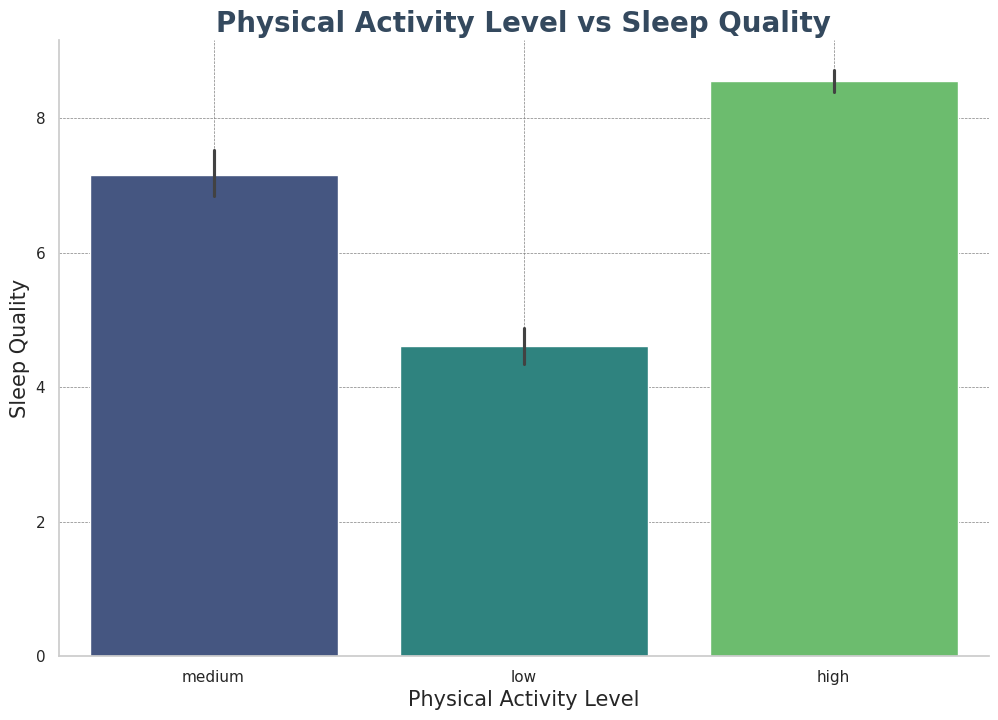


Analyzing Dietary Habits...


<ipython-input-39-266911e912ee>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_sleep_quality = self.df.groupby('Dietary Habits')['Sleep Quality'].mean()


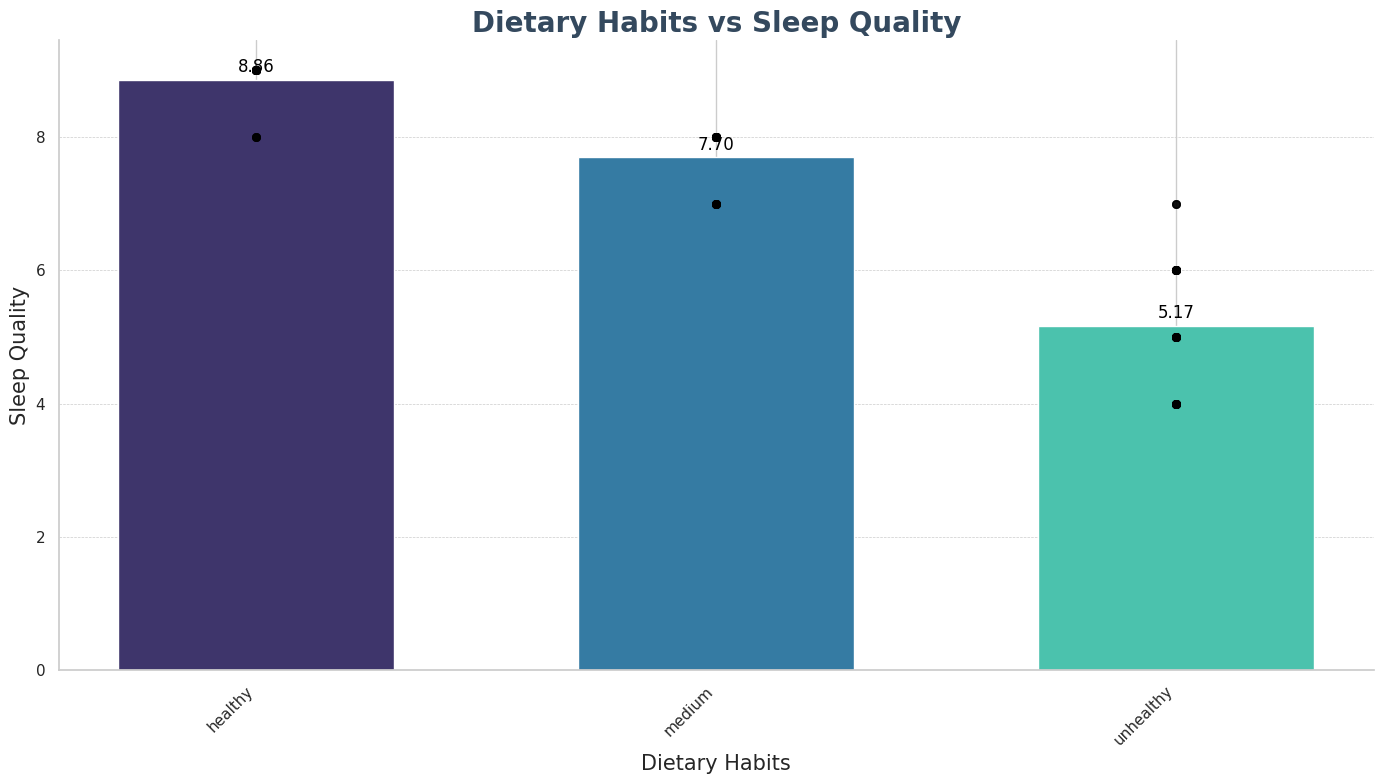


Analyzing Sleep Disorders...


<ipython-input-35-4e886e64986b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


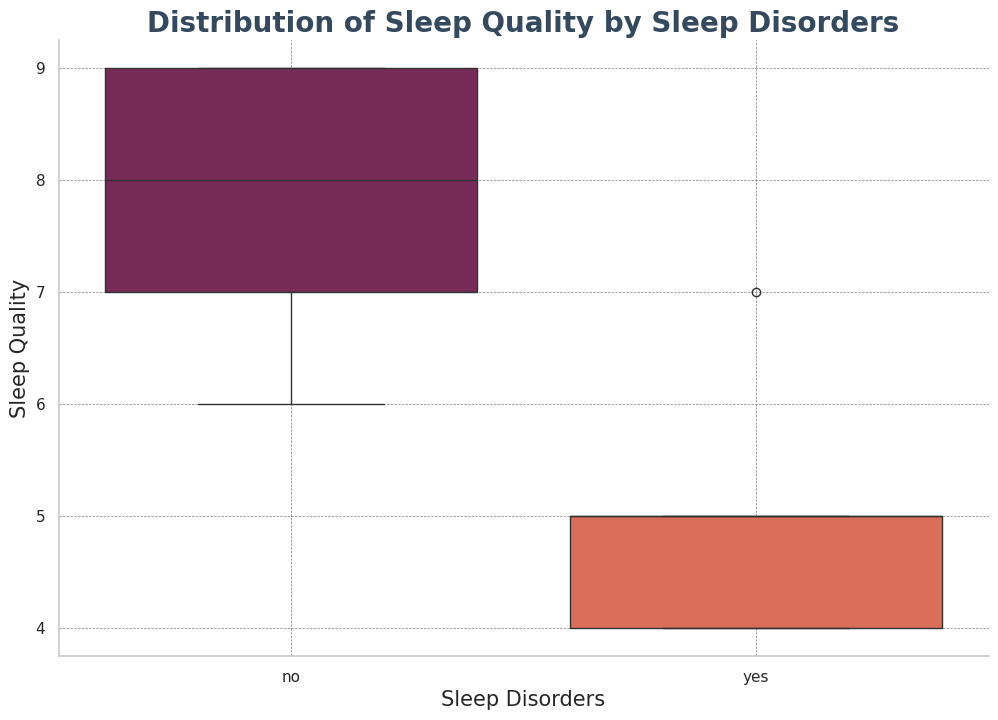


Conducting Final Comprehensive Analysis...


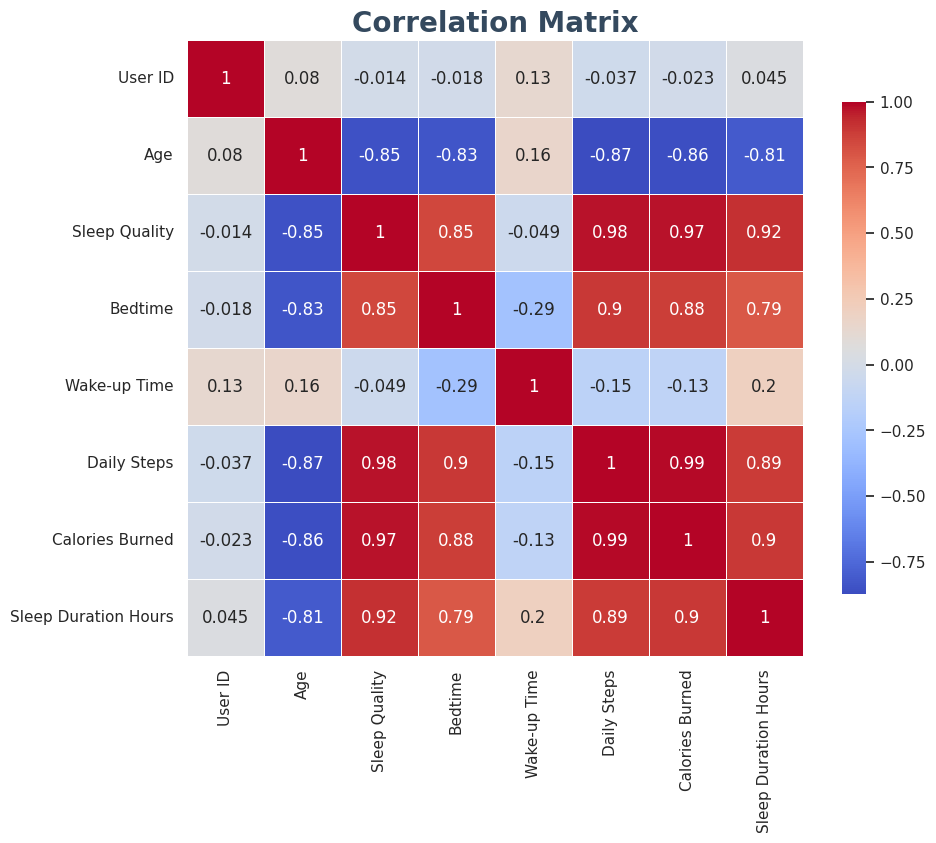

In [40]:


def load_data():
    # Step 1: Load Data
    data_loader = DataLoader()  # Automatically loads the built-in CSV file
    print("Dataset Information:")
    data_loader.display_info()
    return data_loader.df

def analyze_age_vs_sleep_quality(df):
    # Step 2: Basic Data Analysis - Age vs Sleep Quality
    print("\nAnalyzing Age vs Sleep Quality...")
    analysis = DataAnalysis(df)
    analysis.plot_age_vs_sleep_quality()
    print("Correlation coefficient between Age and Sleep Quality:", analysis.correlation())

def analyze_sleep_duration(df):
    # Step 3: Sleep Duration Analysis
    print("\nAnalyzing Sleep Duration...")
    sleep_analysis = SleepDurationAnalysis(df)
    sleep_analysis.process_sleep_times()
    sleep_analysis.plot_sleep_time_vs_quality()
    #print("R-squared value for Sleep Duration vs Sleep Quality:", sleep_analysis.linear_regression_on_sleep_duration())

def analyze_physical_activity(df):
    # Step 4: Physical Activity Analysis
    print("\nAnalyzing Physical Activity...")
    physical_activity_analysis = PhysicalActivityAnalysis(df)
    physical_activity_analysis.plot_physical_activity_vs_sleep_quality()

def analyze_dietary_habits(df):
    # Step 5: Dietary Habits Analysis
    print("\nAnalyzing Dietary Habits...")
    dietary_analysis = DietaryHabitsAnalysis(df)
    dietary_analysis.plot_dietary_habits_vs_sleep_quality()

def analyze_sleep_disorders(df):
    # Step 6: Sleep Disorder Analysis
    print("\nAnalyzing Sleep Disorders...")
    sleep_disorder_analysis = SleepDisorderAnalysis(df)
    sleep_disorder_analysis.plot_sleep_disorder_vs_sleep_quality()

def final_comprehensive_analysis(df):
    # Step 7: Final Comprehensive Analysis
    print("\nConducting Final Comprehensive Analysis...")
    final_analysis = FinalAnalysis(df)
    final_analysis.correlation_matrix()

def main():
    df = load_data()
    analyze_age_vs_sleep_quality(df)
    analyze_sleep_duration(df)
    analyze_physical_activity(df)
    analyze_dietary_habits(df)
    analyze_sleep_disorders(df)
    final_comprehensive_analysis(df)

if __name__ == "__main__":
    main()